In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show
from skimage.feature import match_template
import numpy as np
from PIL import Image
from rasterio.mask import mask

In [8]:
polyData = gpd.read_file('Shp/Export_Output1.shp')
print('CRS of Polygon Data: ' + str(polyData.crs))

CRS of Polygon Data: PROJCS["SLD99 / Sri Lanka Grid 1999",GEOGCS["SLD99",DATUM["Sri_Lanka_Datum_1999",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]],AUTHORITY["EPSG","1053"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",7.00016975],PARAMETER["central_meridian",80.46181671],PARAMETER["scale_factor",0.9999238418],PARAMETER["false_easting",500000],PARAMETER["false_northing",500000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [9]:
raster = rasterio.open('Rst/result.tif')
print('CRS of Raster Data: ' + str(raster.crs))
print('Number of Raster Bands: ' + str(raster.count))
print('Interpretation of Raster Bands: ' + str(raster.colorinterp))

CRS of Raster Data: LOCAL_CS["SLD99 / Sri Lanka Grid 1999",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Number of Raster Bands: 4
Interpretation of Raster Bands: (<ColorInterp.red: 3>, <ColorInterp.green: 4>, <ColorInterp.blue: 5>, <ColorInterp.alpha: 6>)


In [15]:
mask = rasterio.features.geometry_mask(polyData.geometry,
                                       out_shape=raster.shape,
                                       transform=raster.transform,
                                       invert=True)

In [16]:
raster_masked = raster.read(1, masked=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_3620\2491750984.py:1: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  raster_masked = raster.read(1, masked=True)


In [17]:
template = np.ones((32, 32), dtype=np.uint8)
corr = match_template(raster_masked, template, pad_input=True, mode='constant')

In [18]:
thresh = 0.75
corr[corr < thresh] = 0
corr[corr >= thresh] = 1

C:\Users\Pc\anaconda3\lib\site-packages\rasterio\plot.py:112: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  arr = source.read(rgb_indexes, masked=True)


<AxesSubplot:>

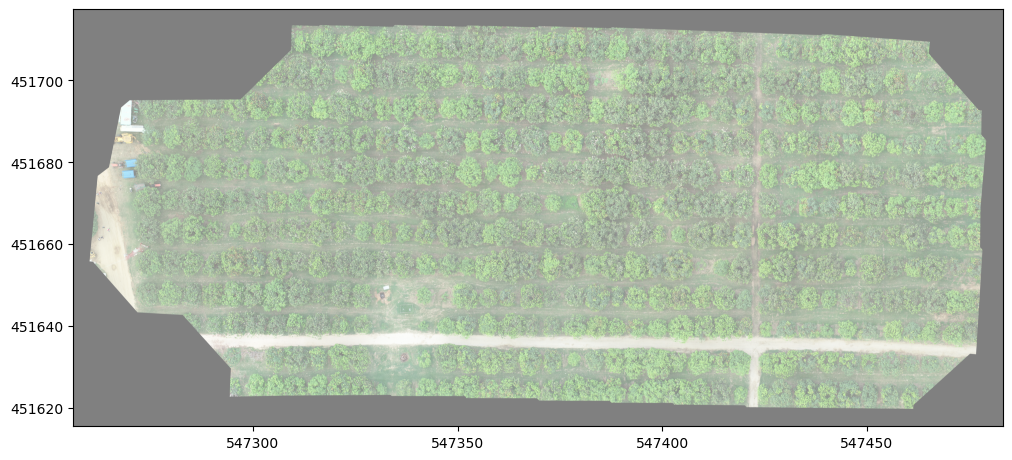

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
show(corr, ax=ax, cmap='gray')
show(raster, ax=ax, alpha=0.5)